In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PD = pd.read_csv("./features/total_features_PD.csv")
Intact = pd.read_csv("./features/total_features_intact.csv")
PD.head()

,Unnamed: 0,file_name,spike_number,max,min_AHP,threshold,TTP_max,TTP_AHP,amplitude,spike_width,Type
0,0,./Data/PD/N1_PD.txt,1,29.846191,-60.012817,-40.634155,0.00016,0.00052,70.480346,0.000157,PD
1,1,./Data/PD/N1_PD.txt,2,21.194458,-58.456421,-33.676147,0.00016,0.00060,54.870605,0.000172,PD
2,2,./Data/PD/N1_PD.txt,3,16.677856,-57.418823,-33.523560,0.00018,0.00064,50.201416,0.000193,PD
3,3,./Data/PD/N1_PD.txt,4,13.961792,-56.655884,-30.731201,0.00018,0.00068,44.692993,0.000199,PD
4,4,./Data/PD/N1_PD.txt,5,11.932373,-55.892944,-30.349731,0.00018,0.00066,42.282104,0.000208,PD


In [3]:
#Parameters
spike_number = 3

In [4]:
#Extract needed data https://blog.csdn.net/qq_45708377/article/details/114459350
PD_selected = PD[PD["spike_number"].between(1,spike_number)]
Intact_selected = Intact[Intact["spike_number"].between(1,spike_number)]
PD_first_spikes = PD[PD["spike_number"].between(1,1)]
Intact_first_spikes = Intact[Intact["spike_number"].between(1,1)]

PD_selected.to_csv("./features/PD_selected.csv")
Intact_selected.to_csv("./features/Intact_selected.csv")


Data overview
https://zhuanlan.zhihu.com/p/475830334

In [20]:
PD_first_spikes.describe()

,Unnamed: 0,spike_number,max,min_AHP,threshold,TTP_max,TTP_AHP,amplitude,spike_width
count,8.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,47.250000,1.0,16.667709,-60.654297,-45.588150,0.000128,0.000505,62.255859,0.000156
std,37.116612,0.0,13.746784,4.658510,3.293494,0.000047,0.000252,14.554556,0.000075
min,0.000000,1.0,-5.493164,-69.519043,-50.170898,0.000080,0.000220,38.528442,0.000084
25%,20.750000,1.0,11.882782,-62.810212,-47.935486,0.000080,0.000300,58.345794,0.000095
50%,41.500000,1.0,22.460938,-60.226440,-45.265198,0.000130,0.000460,69.831848,0.000128
75%,71.750000,1.0,24.595948,-57.167053,-43.609467,0.000165,0.000710,71.197510,0.000233
max,105.000000,1.0,29.846191,-55.160522,-40.634155,0.000180,0.000900,73.165894,0.000254


In [21]:
Intact_first_spikes.describe()

,Unnamed: 0,spike_number,max,min_AHP,threshold,TTP_max,TTP_AHP,amplitude,spike_width
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,24.500000,1.0,32.777198,-59.128015,-51.114100,0.000126,0.000806,83.891298,0.000222
std,16.133127,0.0,10.310361,4.197354,5.182456,0.000019,0.000133,6.007935,0.000038
min,0.000000,1.0,11.547610,-67.080930,-58.810670,0.000100,0.000640,70.358280,0.000161
25%,12.500000,1.0,28.848237,-60.322905,-55.310392,0.000120,0.000705,82.416535,0.000208
50%,24.500000,1.0,34.242920,-57.874390,-50.367070,0.000120,0.000790,86.380010,0.000230
75%,36.750000,1.0,41.822603,-56.009125,-46.130555,0.000140,0.000930,88.069910,0.000246
max,48.000000,1.0,42.561160,-55.301640,-45.581790,0.000160,0.001000,88.516240,0.000271


<AxesSubplot:title={'center':'PD'}>

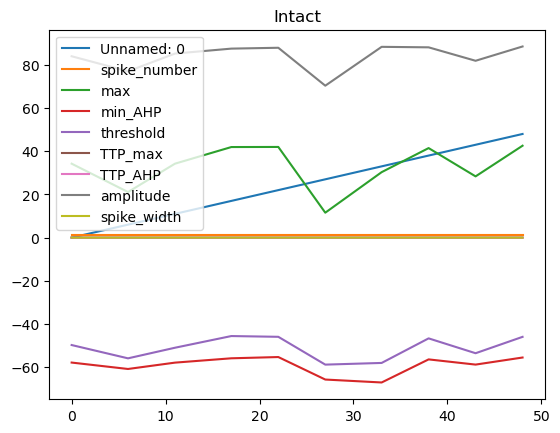

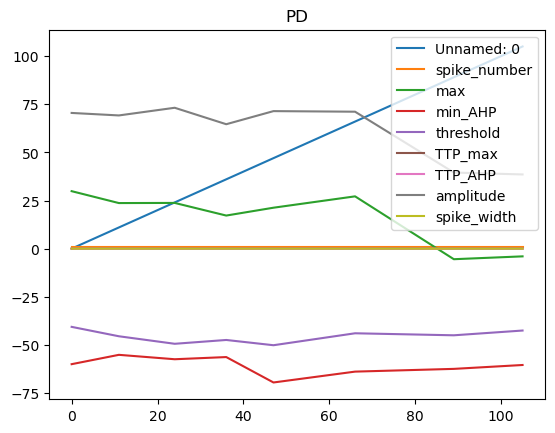

In [38]:
Intact_first_spikes.plot(title="Intact")
PD_first_spikes.plot(title="PD")

Intact
PD


<AxesSubplot:>

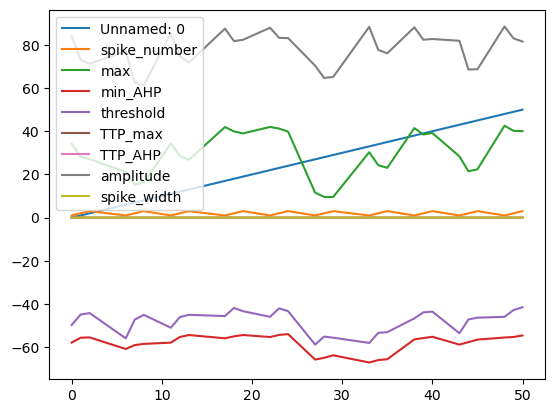

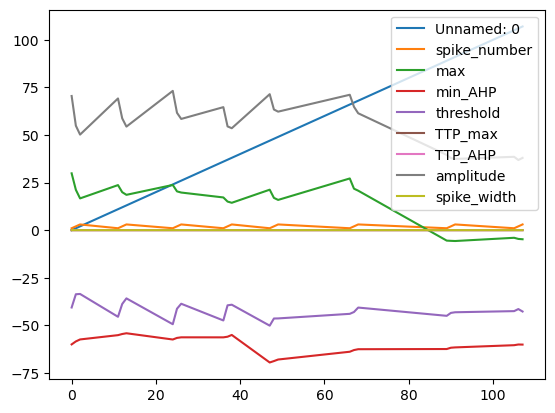

In [28]:
print("Intact")
Intact_selected.plot()
PD_selected.plot()

<AxesSubplot:title={'center':'PD'}, ylabel='Frequency'>

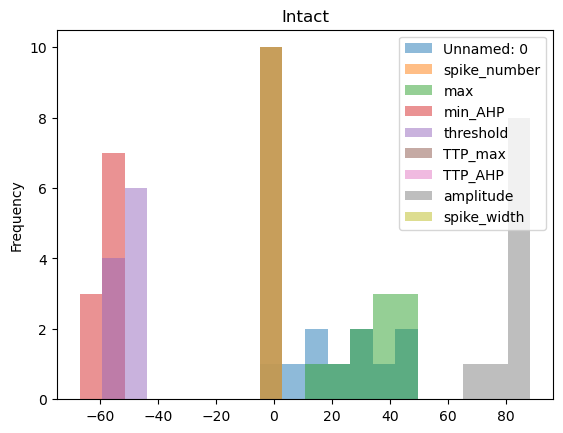

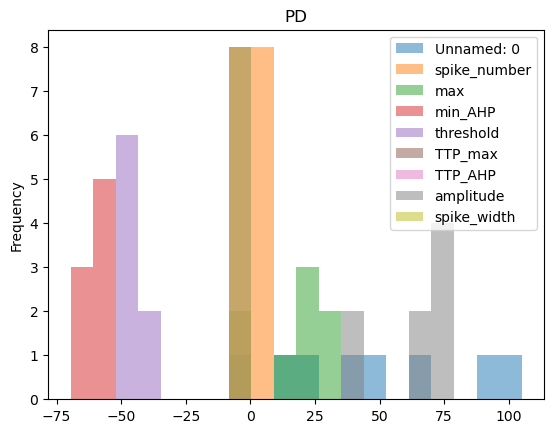

In [37]:
Intact_first_spikes.plot.hist(title="Intact",alpha=0.5,bins=20)
PD_first_spikes.plot.hist(title="PD",alpha=0.5,bins=20)

<AxesSubplot:title={'center':'PD'}>

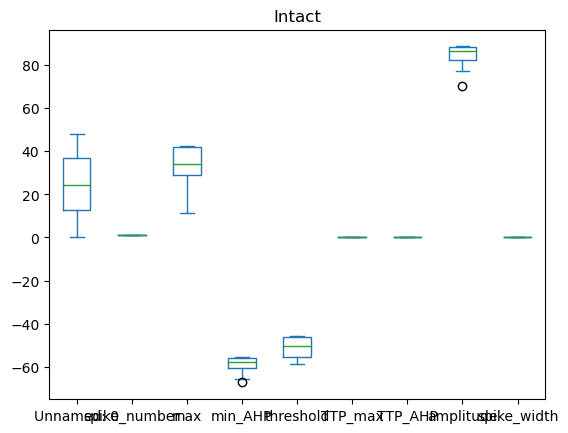

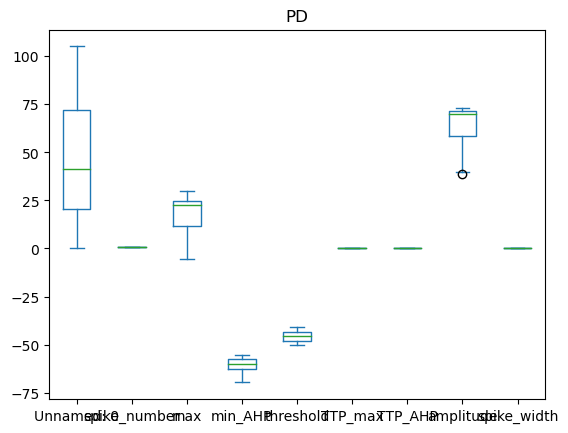

In [39]:
Intact_first_spikes.plot.box(title="Intact")
PD_first_spikes.plot.box(title="PD")

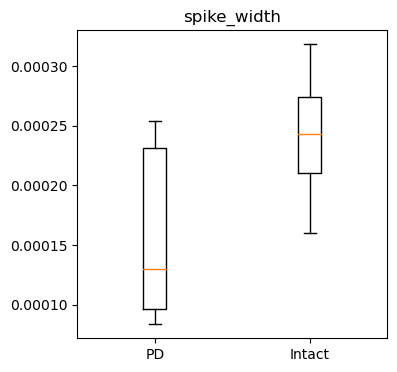

In [6]:
def compare_data(column_name,PD,In):
    #@ should be PD, Intact
    a = PD[column_name]
    b = In[column_name]
    data = [a,b]
    fig,ax=plt.subplots(figsize=(4,4))
    ax.boxplot(data)
    title = ax.set_title(column_name)
    labels = ax.set_xticklabels(["PD","Intact"])
# max	min_AHP	threshold	TTP_max	TTP_AHP	amplitude	spike_width
compare_data("spike_width",PD_selected,Intact_selected)
